In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import tsfel

In [2]:
X_train = pd.read_csv("train\X_train.txt", delim_whitespace=True, header=None)
X_test = pd.read_csv("test\X_test.txt", delim_whitespace=True, header=None)

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()

<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:2: SyntaxWarning: invalid escape sequence '\X'
<>:1: SyntaxWarning: invalid escape sequence '\X'
<>:2: SyntaxWarning: invalid escape sequence '\X'
C:\Users\Jyo\AppData\Local\Temp\ipykernel_5644\2878817264.py:1: SyntaxWarning: invalid escape sequence '\X'
  X_train = pd.read_csv("train\X_train.txt", delim_whitespace=True, header=None)
C:\Users\Jyo\AppData\Local\Temp\ipykernel_5644\2878817264.py:2: SyntaxWarning: invalid escape sequence '\X'
  X_test = pd.read_csv("test\X_test.txt", delim_whitespace=True, header=None)
C:\Users\Jyo\AppData\Local\Temp\ipykernel_5644\2878817264.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv("train\X_train.txt", delim_whitespace=True, header=None)
C:\Users\Jyo\AppData\Local\Temp\ipykernel_5644\2878817264.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated

In [3]:
y_train = pd.read_csv("train\y_train.txt", delim_whitespace=True, header=None, dtype=int)
y_test = pd.read_csv("test\y_test.txt", delim_whitespace=True, header=None, dtype=int)

y_train = y_train.to_numpy().ravel()
y_test = y_test.to_numpy().ravel()

<>:1: SyntaxWarning: invalid escape sequence '\y'
<>:2: SyntaxWarning: invalid escape sequence '\y'
<>:1: SyntaxWarning: invalid escape sequence '\y'
<>:2: SyntaxWarning: invalid escape sequence '\y'
C:\Users\Jyo\AppData\Local\Temp\ipykernel_5644\3904274521.py:1: SyntaxWarning: invalid escape sequence '\y'
  y_train = pd.read_csv("train\y_train.txt", delim_whitespace=True, header=None, dtype=int)
C:\Users\Jyo\AppData\Local\Temp\ipykernel_5644\3904274521.py:2: SyntaxWarning: invalid escape sequence '\y'
  y_test = pd.read_csv("test\y_test.txt", delim_whitespace=True, header=None, dtype=int)
C:\Users\Jyo\AppData\Local\Temp\ipykernel_5644\3904274521.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv("train\y_train.txt", delim_whitespace=True, header=None, dtype=int)
C:\Users\Jyo\AppData\Local\Temp\ipykernel_5644\3904274521.py:2: FutureWarning: The 'delim_whitespace' key

In [4]:
y_train.shape

(7352,)

In [5]:
X_train.shape

(7352, 561)

In [6]:
X_test.shape

(2947, 561)

In [7]:
y_test.shape

(2947,)

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

param_grid  = {'C':[0.03, 0.5, 1, 10, 50, 100]}
svm_model = LinearSVC(random_state=42)
grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.03, 0.5, 1, 10, 50, 100]}, scoring='accuracy',
             verbose=1)

In [10]:
best_svm_model = grid_search.best_estimator_

In [11]:
y_pred = best_svm_model.predict(X_test_scaled)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

Accuracy: 0.9600
F1 Score: 0.9601
Precision: 0.9621
Recall: 0.9600


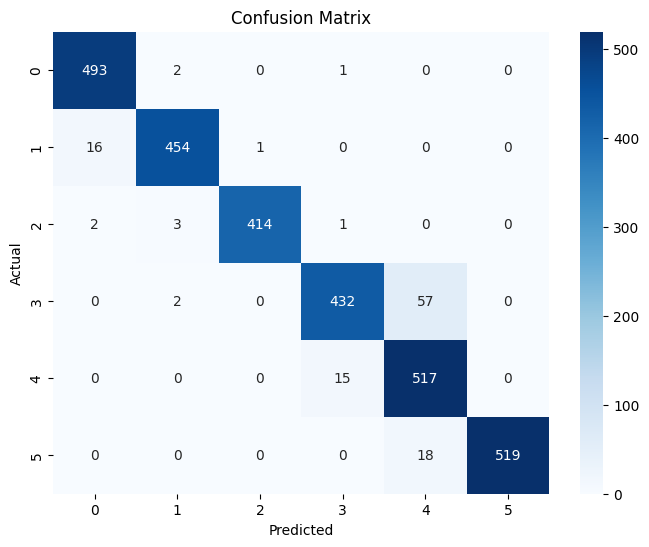

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [14]:
from sklearn import linear_model

parameters_log = {'C':[0.03, 0.5, 1, 10, 50, 100]}
log = linear_model.LogisticRegression()
log_grid = GridSearchCV(log, param_grid=parameters_log, n_jobs=-1, verbose=1)
log_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.03, 0.5, 1, 10, 50, 100]}, verbose=1)

In [15]:
best_log_model = log_grid.best_estimator_

In [16]:
y_pred_log = best_log_model.predict(X_test_scaled)

In [17]:
accuracy_log = accuracy_score(y_test, y_pred_log)
f1_log = f1_score(y_test, y_pred_log, average='weighted')
precision_log = precision_score(y_test, y_pred_log, average='weighted')
recall_log = recall_score(y_test, y_pred_log, average='weighted')

print(f"Best Parameters (Logistic Regression): {log_grid.best_params_}")
print(f"Logistic Regression Accuracy: {accuracy_log:.4f}")
print(f"Logistic Regression F1 Score: {f1_log:.4f}")
print(f"Logistic Regression Precision: {precision_log:.4f}")
print(f"Logistic Regression Recall: {recall_log:.4f}")

Best Parameters (Logistic Regression): {'C': 0.5}
Logistic Regression Accuracy: 0.9501
Logistic Regression F1 Score: 0.9501
Logistic Regression Precision: 0.9524
Logistic Regression Recall: 0.9501


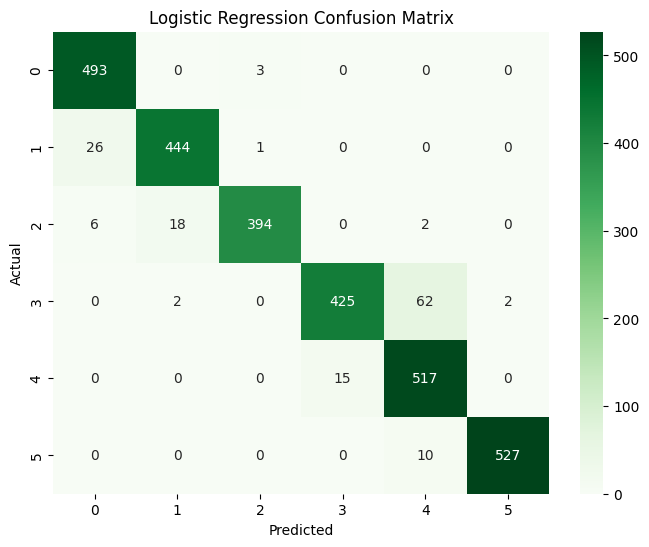

In [18]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Greens')
plt.title("Logistic Regression Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
from sklearn.svm import SVC

parameters_svm = {'C':[0.03, 0.5, 1, 10, 50, 100]}
svm_model = SVC(kernel='rbf')
svm_grid = GridSearchCV(svm_model, param_grid=parameters_svm, n_jobs=-1, verbose=1)
svm_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.03, 0.5, 1, 10, 50, 100]}, verbose=1)

In [20]:
best_svm_model = svm_grid.best_estimator_

In [21]:
y_pred_svm = best_svm_model.predict(X_test_scaled)

In [22]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')

print(f"Best Parameters (SVM): {svm_grid.best_params_}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")
print(f"SVM F1 Score: {f1_svm:.4f}")
print(f"SVM Precision: {precision_svm:.4f}")
print(f"SVM Recall: {recall_svm:.4f}")

Best Parameters (SVM): {'C': 10}
SVM Accuracy: 0.9549
SVM F1 Score: 0.9547
SVM Precision: 0.9556
SVM Recall: 0.9549


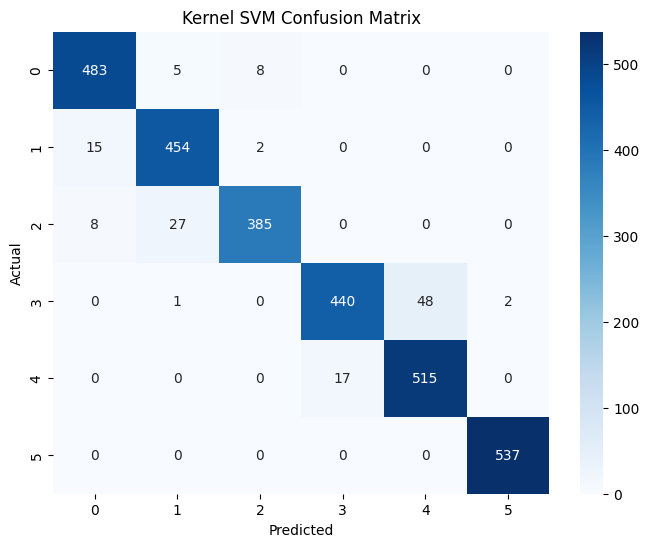

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Kernel SVM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [24]:
from sklearn.tree import DecisionTreeClassifier

parameters_dt = {'max_depth': [3, 5, 10, None]}
dt_model = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt_model, param_grid=parameters_dt, n_jobs=-1, verbose=1)
dt_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None]}, verbose=1)

In [25]:
best_dt_model = dt_grid.best_estimator_

In [26]:
y_pred_dt = best_dt_model.predict(X_test_scaled)

In [27]:
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')

print(f"Best Parameters (DT): {dt_grid.best_params_}")
print(f"DT Accuracy: {accuracy_dt:.4f}")
print(f"DT F1 Score: {f1_dt:.4f}")
print(f"DT Precision: {precision_dt:.4f}")
print(f"DT Recall: {recall_dt:.4f}")

Best Parameters (DT): {'max_depth': 10}
DT Accuracy: 0.8728
DT F1 Score: 0.8722
DT Precision: 0.8741
DT Recall: 0.8728


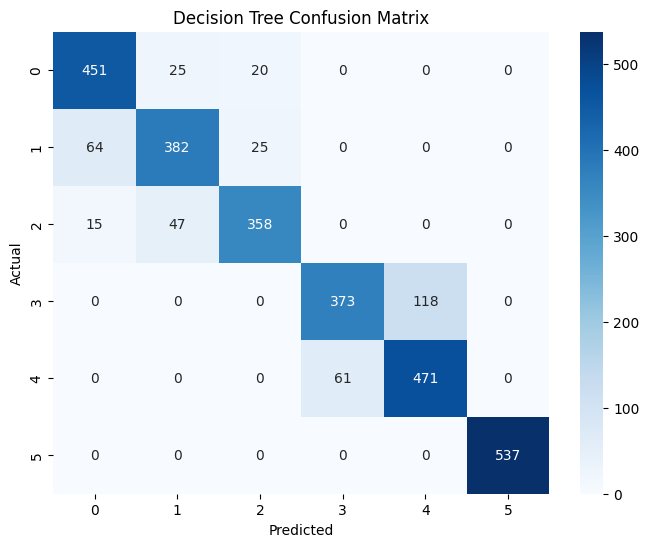

In [28]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
from sklearn.ensemble import RandomForestClassifier

parameters_rf = {'n_estimators': [10, 59, 257], 'max_depth': [3, 5, 10, None]}
rf_model = RandomForestClassifier()
rf_grid = GridSearchCV(rf_model, param_grid=parameters_rf, n_jobs=-1, verbose=1)
rf_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, None],
                         'n_estimators': [10, 59, 257]},
             verbose=1)

In [30]:
y_pred_rf = rf_grid.best_estimator_.predict(X_test_scaled)

In [31]:
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')

print(f"DT Accuracy: {accuracy_rf:.4f}")
print(f"DT F1 Score: {f1_rf:.4f}")
print(f"DT Precision: {precision_rf:.4f}")
print(f"DT Recall: {recall_rf:.4f}")

DT Accuracy: 0.9264
DT F1 Score: 0.9262
DT Precision: 0.9276
DT Recall: 0.9264


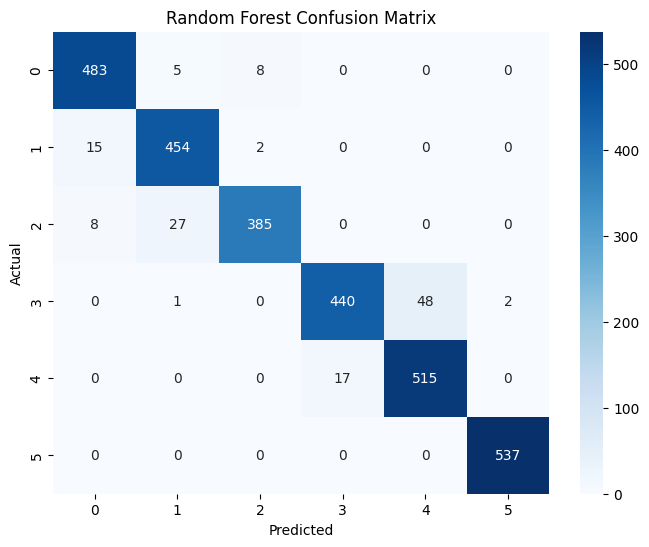

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

parameters_gb = {'n_estimators': [10, 59, 257], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 0.2]}
gb_model = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb_model, param_grid=parameters_gb, n_jobs=-1, verbose=1)
gb_grid.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


KeyboardInterrupt: 

In [ ]:
y_pred_gb = gb_grid.best_estimator_.predict(X_test_scaled)

In [ ]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')

print(f"Gradient Boost Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boost F1 Score: {f1_gb:.4f}")
print(f"Gradient Boost Precision: {precision_gb:.4f}")
print(f"Gradient Boost Recall: {recall_gb:.4f}")

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from xgboost import XGBClassifier

parameters_xgb = {'n_estimators': [10, 59, 257], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 10]}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_grid = GridSearchCV(xgb_model, param_grid=parameters_xgb, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_scaled, y_train)

In [ ]:
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test_scaled)

In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

print(f"xGradient Boost Accuracy: {accuracy_xgb:.4f}")
print(f"xGradient Boost F1 Score: {f1_xgb:.4f}")
print(f"xGradient Boost Precision: {precision_xgb:.4f}")
print(f"xGradient Boost Recall: {recall_xgb:.4f}")

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("xGradient Boost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

##For My own feature Engineering

In [ ]:
X_train_feat = pd.read_csv("X_train_features.csv")
X_test_feat = pd.read_csv("X_test_features.csv")

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_feat_scaled = scaler.fit_transform(X_trainX_train_feat)
X_test_feat_scaled = scaler.transform(X_test_feat)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

parameters_gb = {'n_estimators': [10, 59, 257], 'max_depth': [3, 5, 10], 'learning_rate': [0.01, 0.1, 0.2]}
gb_model = GradientBoostingClassifier()
gb_grid = GridSearchCV(gb_model, param_grid=parameters_gb, n_jobs=-1, verbose=1)
gb_grid.fit(X_train_feat_scaled, y_train)

In [ ]:
y_pred_gb = gb_grid.best_estimator_.predict(X_test_feat_scaled)

In [ ]:
accuracy_gb = accuracy_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb, average='weighted')
precision_gb = precision_score(y_test, y_pred_gb, average='weighted')
recall_gb = recall_score(y_test, y_pred_gb, average='weighted')

print(f"Gradient Boost Accuracy: {accuracy_gb:.4f}")
print(f"Gradient Boost F1 Score: {f1_gb:.4f}")
print(f"Gradient Boost Precision: {precision_gb:.4f}")
print(f"Gradient Boost Recall: {recall_gb:.4f}")

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_gb), annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from xgboost import XGBClassifier

parameters_xgb = {'n_estimators': [10, 59, 257], 'learning_rate': [0.01, 0.1, 0.3], 'max_depth': [3, 5, 10]}
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_grid = GridSearchCV(xgb_model, param_grid=parameters_xgb, n_jobs=-1, verbose=1)
xgb_grid.fit(X_train_feat_scaled, y_train)

In [ ]:
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test_feat_scaled)

In [ ]:
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')

print(f"xGradient Boost Accuracy: {accuracy_xgb:.4f}")
print(f"xGradient Boost F1 Score: {f1_xgb:.4f}")
print(f"xGradient Boost Precision: {precision_xgb:.4f}")
print(f"xGradient Boost Recall: {recall_xgb:.4f}")

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', cmap='Blues')
plt.title("xGradient Boost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()